In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

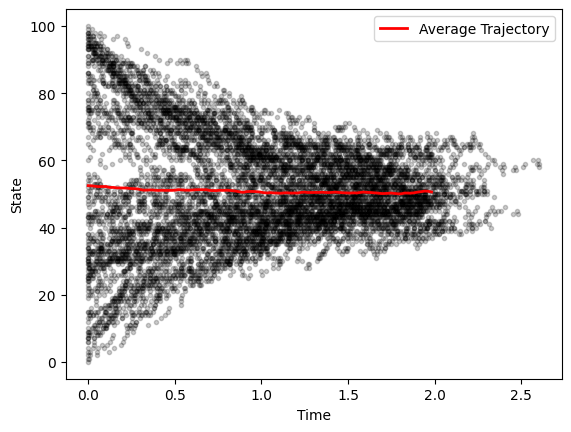

In [28]:
"""
Refering to the fiber exercise
Lets perhaps, initially, bound
the number of monomers to
[0, 100]
We also only have two state
transition options per time
Drop a monomer or add one (?)
"""

N = 100 # Total number of monomers

# Choosing initial state

state_i = random.randint(0, N)

#Params
alpha = 0.5
beta = 0.5

def compute_W(state, alpha, beta, N):
    return (state * beta + alpha * (N - state))


def next_state(state, alpha, beta, N):
    if state == 0:
        state += 1
    elif state == N:
        state -= 1
    else:
        r1 = random.uniform(0, 1)
        if r1 < (state * beta)/compute_W(state, alpha, beta, N):
            state -= 1
        else:
            state += 1

    return state

def compute_t(state, alpha, beta, N):
    
    r2 = random.uniform(0,1)
    delta_t = -(1/compute_W(state, alpha, beta, N))*np.log(1-r2)

    return delta_t

def evolution(N, alpha, beta, n_iter):
    t = [0]
    states = [random.randint(0,100)]

    for i in range(n_iter):
        t.append(t[-1] + compute_t(states[i], alpha, beta, N))
        states.append(next_state(states[i], alpha, beta, N))

    return t, states

t, states = evolution(N, alpha, beta, 100)

n_sims = 100 #Number of trajectories
def gillespie(n_sims):
    ts = []
    state_sets = []

    for i in range(n_sims):
        t, states = evolution(N, alpha, beta, 100)
        ts.append(t)
        state_sets.append(states)
    return ts, state_sets
ts, state_sets = gillespie(n_sims)

for time, state in zip(ts, state_sets):
    plt.plot(time, state, "k.", alpha = 0.2)  

plt.plot(np.mean(ts, axis = 0), np.mean(state_sets, axis = 0), "r-", label = "Average Trajectory", lw = 2)

plt.xlabel("Time")
plt.ylabel("State")
plt.legend()